In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### LOADING THE UPDATED AND COMBINED DATASET (TRAIN+TEST CSV FILES)

In [2]:
df=pd.read_csv('D:\Synapse NIT-KKR\Datasets_Updated\df_target_encoding.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Hp\AppData\Local\Temp\ipykernel_96052\2300119898.py:1: SyntaxWarning: invalid escape sequence '\S'
  df=pd.read_csv('D:\Synapse NIT-KKR\Datasets_Updated\df_target_encoding.csv')


In [3]:
df.head()

,ID,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,PISTON_COUNT,BLENDED_CONSUMPTION,GEARBOX_TYPE,OUTPUT,BODY_STYLE,EFFICIENCY_RATIO,YEARS_IN_SERVICE,MILEAGE,HIGHWAY_USAGE,ENERGY_SOURCE,EFFICIENCY_RATING
0,0,74.595588,149,8.3,2.0,5,4,7.9,Manual,87,COMPACT,1.60,10,17,5.6,Petrol,39
1,1,62.338357,262,22.5,3.6,15,6,16.5,Automatic,163,SUV - SMALL,1.52,10,19,12.3,Petrol,23
2,2,72.105592,204,11.7,2.8,5,6,10.0,Automatic,172,MID-SIZE,1.59,10,18,10.4,Gas,30
3,3,86.706104,301,23.4,5.7,14,8,13.9,Automatic,286,PICKUP TRUCK - STANDARD,1.42,10,19,13.6,Petrol,28
4,4,104.793985,375,20.5,2.2,5,4,11.9,Manual,118,MID-SIZE,1.54,10,19,9.7,Petrol,26


In [4]:
df.columns

Index(['ID', 'PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
       'DISPLACEMENT', 'CAPACITY', 'PISTON_COUNT', 'BLENDED_CONSUMPTION',
       'GEARBOX_TYPE', 'OUTPUT', 'BODY_STYLE', 'EFFICIENCY_RATIO',
       'YEARS_IN_SERVICE', 'MILEAGE', 'HIGHWAY_USAGE', 'ENERGY_SOURCE',
       'EFFICIENCY_RATING'],
      dtype='object')

In [5]:
df.shape

(4937, 17)

In [6]:
df.describe()

,ID,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,PISTON_COUNT,BLENDED_CONSUMPTION,OUTPUT,EFFICIENCY_RATIO,YEARS_IN_SERVICE,MILEAGE,HIGHWAY_USAGE,EFFICIENCY_RATING
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.00000,4937.0,4937.000000,4937.000000,4937.000000
mean,2498.334616,82.443761,263.250354,13.472493,3.226798,6.550334,5.750861,11.998319,167.069273,1.38983,10.0,18.810411,9.571055,27.521774
std,1442.241119,25.272794,67.132991,5.298246,1.355713,3.850681,1.830741,4.521365,79.565440,0.15730,0.0,2.854329,3.209937,10.247088
min,0.000000,41.000000,108.000000,4.600000,1.000000,2.000000,3.000000,4.700000,50.000000,0.87000,10.0,10.000000,4.900000,11.000000
25%,1252.000000,64.741667,212.000000,9.700000,2.100000,5.000000,4.000000,8.700000,102.000000,1.31000,10.0,17.000000,7.200000,20.000000
50%,2498.000000,76.447494,256.000000,12.200000,3.200000,5.000000,6.000000,11.000000,153.000000,1.40000,10.0,18.000000,9.000000,26.000000
75%,3746.000000,95.484161,299.000000,16.300000,4.000000,7.000000,8.000000,13.900000,223.000000,1.49000,10.0,21.000000,11.200000,33.000000
max,4999.000000,212.000000,470.000000,30.200000,7.000000,18.000000,12.000000,25.800000,378.000000,1.77000,10.0,30.000000,20.500000,60.000000


#### NOW FROM HERE, WE'LL APPLY ONE-HOT ENCODING TO 'GEARBOX_TYPE' AND 'ENERGY_SOURCE' 

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
encoder=OneHotEncoder()

In [9]:
encoded=encoder.fit_transform(df[['GEARBOX_TYPE','ENERGY_SOURCE']])

In [10]:
encoded_df=pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out())

In [11]:
encoded_df

,GEARBOX_TYPE_Automatic,GEARBOX_TYPE_Manual,GEARBOX_TYPE_eMr,ENERGY_SOURCE_Diesel,ENERGY_SOURCE_Gas,ENERGY_SOURCE_Petrol
0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
4932,1.0,0.0,0.0,0.0,0.0,1.0
4933,1.0,0.0,0.0,0.0,0.0,1.0
4934,1.0,0.0,0.0,1.0,0.0,0.0
4935,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
df=pd.concat([df,encoded_df],axis=1)

In [13]:
df

,ID,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,PISTON_COUNT,BLENDED_CONSUMPTION,GEARBOX_TYPE,OUTPUT,...,MILEAGE,HIGHWAY_USAGE,ENERGY_SOURCE,EFFICIENCY_RATING,GEARBOX_TYPE_Automatic,GEARBOX_TYPE_Manual,GEARBOX_TYPE_eMr,ENERGY_SOURCE_Diesel,ENERGY_SOURCE_Gas,ENERGY_SOURCE_Petrol
0,0,74.595588,149,8.3,2.0,5,4,7.9,Manual,87,...,17,5.6,Petrol,39,0.0,1.0,0.0,0.0,0.0,1.0
1,1,62.338357,262,22.5,3.6,15,6,16.5,Automatic,163,...,19,12.3,Petrol,23,1.0,0.0,0.0,0.0,0.0,1.0
2,2,72.105592,204,11.7,2.8,5,6,10.0,Automatic,172,...,18,10.4,Gas,30,1.0,0.0,0.0,0.0,1.0,0.0
3,3,86.706104,301,23.4,5.7,14,8,13.9,Automatic,286,...,19,13.6,Petrol,28,1.0,0.0,0.0,0.0,0.0,1.0
4,4,104.793985,375,20.5,2.2,5,4,11.9,Manual,118,...,19,9.7,Petrol,26,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,4995,113.241839,311,16.1,5.1,7,6,9.6,Automatic,264,...,19,7.3,Petrol,27,1.0,0.0,0.0,0.0,0.0,1.0
4933,4996,103.952918,286,18.5,3.5,7,8,15.1,Automatic,266,...,17,12.9,Petrol,20,1.0,0.0,0.0,0.0,0.0,1.0
4934,4997,64.741667,225,10.5,1.4,4,4,6.1,Automatic,87,...,17,6.8,Diesel,31,1.0,0.0,0.0,1.0,0.0,0.0
4935,4998,78.366368,233,9.8,3.1,5,4,8.7,Automatic,115,...,16,7.0,Gas,33,1.0,0.0,0.0,0.0,1.0,0.0


In [14]:
def target_encode(df, column, target):
    # Calculate mean of the target for each category
    target_means = df.groupby(column)[target].mean()
    # Replace categories with their target mean
    encoded_column = df[column].map(target_means)
    return encoded_column

In [15]:
df['BODY_STYLE_ENCODED'] = target_encode(df, 'BODY_STYLE', 'EFFICIENCY_RATING')

In [16]:
df

,ID,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,PISTON_COUNT,BLENDED_CONSUMPTION,GEARBOX_TYPE,OUTPUT,...,HIGHWAY_USAGE,ENERGY_SOURCE,EFFICIENCY_RATING,GEARBOX_TYPE_Automatic,GEARBOX_TYPE_Manual,GEARBOX_TYPE_eMr,ENERGY_SOURCE_Diesel,ENERGY_SOURCE_Gas,ENERGY_SOURCE_Petrol,BODY_STYLE_ENCODED
0,0,74.595588,149,8.3,2.0,5,4,7.9,Manual,87,...,5.6,Petrol,39,0.0,1.0,0.0,0.0,0.0,1.0,32.355805
1,1,62.338357,262,22.5,3.6,15,6,16.5,Automatic,163,...,12.3,Petrol,23,1.0,0.0,0.0,0.0,0.0,1.0,29.212978
2,2,72.105592,204,11.7,2.8,5,6,10.0,Automatic,172,...,10.4,Gas,30,1.0,0.0,0.0,0.0,1.0,0.0,29.093814
3,3,86.706104,301,23.4,5.7,14,8,13.9,Automatic,286,...,13.6,Petrol,28,1.0,0.0,0.0,0.0,0.0,1.0,21.900875
4,4,104.793985,375,20.5,2.2,5,4,11.9,Manual,118,...,9.7,Petrol,26,0.0,1.0,0.0,0.0,0.0,1.0,29.093814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,4995,113.241839,311,16.1,5.1,7,6,9.6,Automatic,264,...,7.3,Petrol,27,1.0,0.0,0.0,0.0,0.0,1.0,29.093814
4933,4996,103.952918,286,18.5,3.5,7,8,15.1,Automatic,266,...,12.9,Petrol,20,1.0,0.0,0.0,0.0,0.0,1.0,23.412500
4934,4997,64.741667,225,10.5,1.4,4,4,6.1,Automatic,87,...,6.8,Diesel,31,1.0,0.0,0.0,1.0,0.0,0.0,29.093814
4935,4998,78.366368,233,9.8,3.1,5,4,8.7,Automatic,115,...,7.0,Gas,33,1.0,0.0,0.0,0.0,1.0,0.0,29.093814


In [17]:
columns_to_drop=['BODY_STYLE','GEARBOX_TYPE','ENERGY_SOURCE']
df=df.drop(columns_to_drop, axis=1)

### FOR 'BODY_STYLE', TARGET ENCODING HAS BEEN APPLIED
### FOR 'GEARBOX_TYPE' AND 'ENERGY_SOURCE', ONE-HOT ENCODING HAS BEEN APPLIED

In [18]:
df.shape

(4937, 21)

In [19]:
df.corr()

,ID,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,PISTON_COUNT,BLENDED_CONSUMPTION,OUTPUT,EFFICIENCY_RATIO,...,MILEAGE,HIGHWAY_USAGE,EFFICIENCY_RATING,GEARBOX_TYPE_Automatic,GEARBOX_TYPE_Manual,GEARBOX_TYPE_eMr,ENERGY_SOURCE_Diesel,ENERGY_SOURCE_Gas,ENERGY_SOURCE_Petrol,BODY_STYLE_ENCODED
ID,1.000000,-0.010019,0.002443,-0.001318,-0.006538,-0.007201,0.008064,0.007734,0.002613,0.000041,...,-0.014914,0.002502,-0.004992,0.001224,-0.001253,0.000512,-0.020370,-0.005236,0.012349,0.010415
PERFORMANCE_INDEX,-0.010019,1.000000,-0.224967,-0.254326,-0.338878,0.039736,-0.371811,-0.293212,-0.336472,-0.211057,...,-0.084288,-0.281168,0.317113,-0.191910,0.192434,-0.005936,-0.045539,-0.100463,0.115426,0.204342
EMISSIONS_CO2,0.002443,-0.224967,1.000000,0.650905,0.643935,0.059839,0.623069,0.662955,0.683452,0.182297,...,0.466297,0.655624,-0.601073,0.158800,-0.157921,-0.018969,-0.120707,0.120542,-0.076791,-0.429340
URBAN_CONSUMPTION,-0.001318,-0.254326,0.650905,1.000000,0.669641,0.121933,0.623931,0.700026,0.712291,0.219262,...,0.472411,0.687144,-0.607280,0.179404,-0.179553,-0.000655,-0.136360,0.060823,-0.012195,-0.469349
DISPLACEMENT,-0.006538,-0.338878,0.643935,0.669641,1.000000,0.046635,0.757791,0.689283,0.782511,0.258011,...,0.419389,0.679435,-0.642336,0.223540,-0.222605,-0.021189,-0.099012,0.140977,-0.104645,-0.421316
CAPACITY,-0.007201,0.039736,0.059839,0.121933,0.046635,1.000000,0.027989,0.139975,0.098480,-0.169740,...,0.210151,0.117928,-0.005076,0.058413,-0.058027,-0.008106,-0.060426,-0.330933,0.348699,-0.221909
PISTON_COUNT,0.008064,-0.371811,0.623069,0.623931,0.757791,0.027989,1.000000,0.659292,0.793462,0.281776,...,0.359195,0.658737,-0.605608,0.205346,-0.204498,-0.019255,-0.078289,0.197586,-0.167947,-0.414714
BLENDED_CONSUMPTION,0.007734,-0.293212,0.662955,0.700026,0.689283,0.139975,0.659292,1.000000,0.746844,0.220583,...,0.485806,0.713683,-0.627594,0.205967,-0.205359,-0.014910,-0.126519,0.043554,0.001429,-0.537605
OUTPUT,0.002613,-0.336472,0.683452,0.712291,0.782511,0.098480,0.793462,0.746844,1.000000,0.245461,...,0.457241,0.718424,-0.630316,0.226856,-0.226128,-0.017477,-0.112298,0.115485,-0.074747,-0.484636
EFFICIENCY_RATIO,0.000041,-0.211057,0.182297,0.219262,0.258011,-0.169740,0.281776,0.220583,0.245461,1.000000,...,0.007148,0.155106,-0.248562,-0.031836,0.032185,-0.005738,0.047532,0.293137,-0.306765,-0.032713


### HEATMAP FOR CORRELATION MMATRIX

<Axes: >

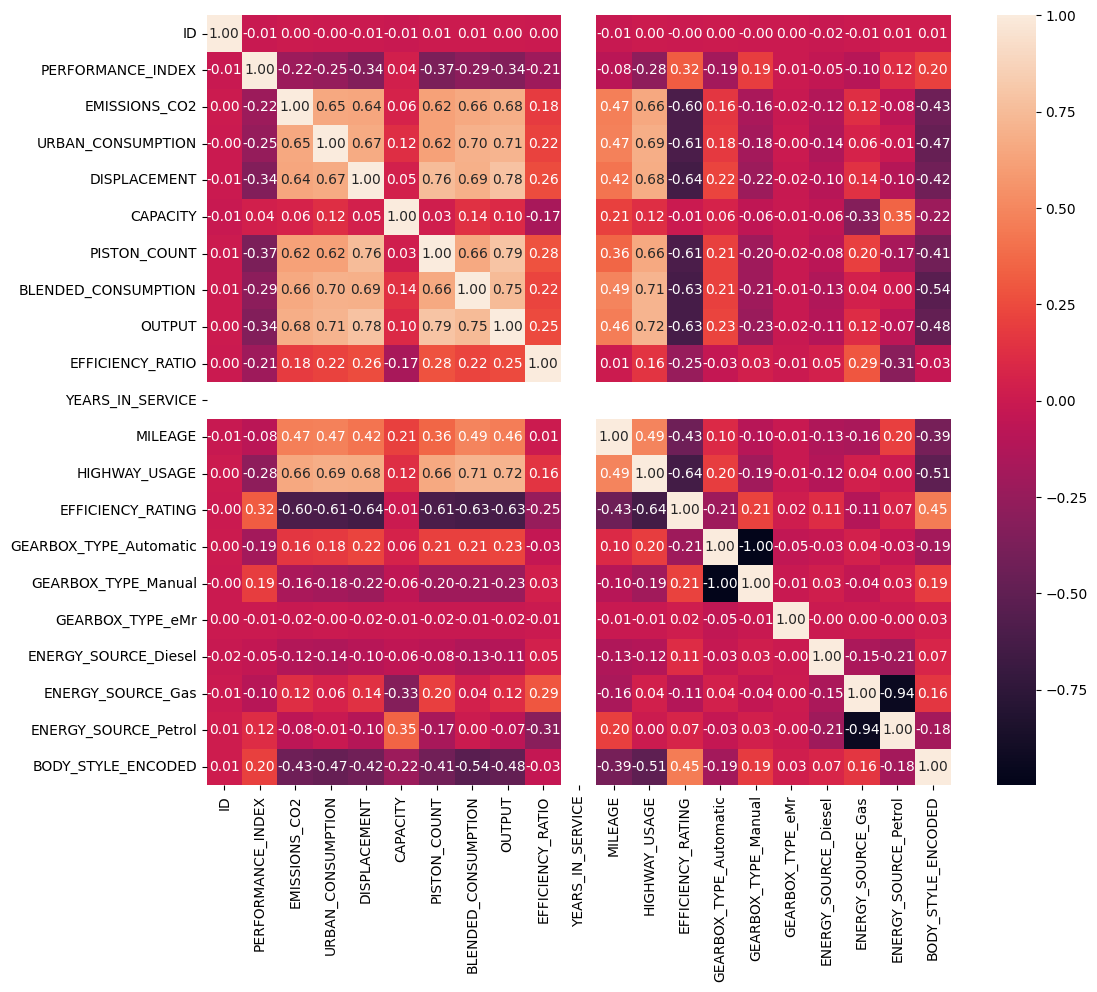

In [20]:
# Set figure size
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed

# Create heatmap
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [21]:
df.columns

Index(['ID', 'PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
       'DISPLACEMENT', 'CAPACITY', 'PISTON_COUNT', 'BLENDED_CONSUMPTION',
       'OUTPUT', 'EFFICIENCY_RATIO', 'YEARS_IN_SERVICE', 'MILEAGE',
       'HIGHWAY_USAGE', 'EFFICIENCY_RATING', 'GEARBOX_TYPE_Automatic',
       'GEARBOX_TYPE_Manual', 'GEARBOX_TYPE_eMr', 'ENERGY_SOURCE_Diesel',
       'ENERGY_SOURCE_Gas', 'ENERGY_SOURCE_Petrol', 'BODY_STYLE_ENCODED'],
      dtype='object')

### FROM THE ABOVE HEATMAP, WE HAVE REACHED TO A CONCLUSION THAT THE COLUMNS(FEATURES) MENTIONED BELOW SHOW HIGH CORRELATION AS COMPARED TO OTHER COLUMNS(FEATURES)

In [22]:
# Define the columns to keep
columns_to_keep = [
    'EMISSIONS_CO2', 
    'URBAN_CONSUMPTION', 
    'DISPLACEMENT', 
    'PISTON_COUNT', 
    'BLENDED_CONSUMPTION', 
    'OUTPUT', 
    'HIGHWAY_USAGE', 
    'EFFICIENCY_RATING'
]

In [23]:
df = df[columns_to_keep]

In [24]:
df.head()

,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,PISTON_COUNT,BLENDED_CONSUMPTION,OUTPUT,HIGHWAY_USAGE,EFFICIENCY_RATING
0,149,8.3,2.0,4,7.9,87,5.6,39
1,262,22.5,3.6,6,16.5,163,12.3,23
2,204,11.7,2.8,6,10.0,172,10.4,30
3,301,23.4,5.7,8,13.9,286,13.6,28
4,375,20.5,2.2,4,11.9,118,9.7,26


### NOW APPLYING STANDARD SCALING TO THE DATASET

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
scaler=StandardScaler()

In [27]:
X=df.iloc[:,:-1] ## Independent features
y=df.iloc[:,-1] ## Dependent feature

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [29]:
X

,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,PISTON_COUNT,BLENDED_CONSUMPTION,OUTPUT,HIGHWAY_USAGE
0,149,8.3,2.0,4,7.9,87,5.6
1,262,22.5,3.6,6,16.5,163,12.3
2,204,11.7,2.8,6,10.0,172,10.4
3,301,23.4,5.7,8,13.9,286,13.6
4,375,20.5,2.2,4,11.9,118,9.7
...,...,...,...,...,...,...,...
4932,311,16.1,5.1,6,9.6,264,7.3
4933,286,18.5,3.5,8,15.1,266,12.9
4934,225,10.5,1.4,4,6.1,87,6.8
4935,233,9.8,3.1,4,8.7,115,7.0


In [30]:
y

0       39
1       23
2       30
3       28
4       26
        ..
4932    27
4933    20
4934    31
4935    33
4936    12
Name: EFFICIENCY_RATING, Length: 4937, dtype: int64

In [31]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3949, 7), (3949,), (988, 7), (988,))

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### LINEAR REGRESSION

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression=LinearRegression()

In [35]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [36]:
regression.coef_

array([-1.42319825, -1.04046317, -1.91912343, -0.9380615 , -1.34369207,
       -0.04689951, -1.92961431])

In [37]:
regression.intercept_

27.309698657888074

In [38]:
y_pred_test=regression.predict(X_test_scaled)

In [39]:
y_pred_test

array([30.17784269, 32.5027568 , 31.11135879, 32.52874469, 29.24818384,
       32.90171352, 15.38631018, 36.61388697, 23.6445671 , 32.28720455,
       18.15221766, 34.61339972, 37.57091585, 33.81034382, 32.80221147,
       29.68849613, 20.50342417, 18.54887937, 26.24077758, 26.41309773,
       16.38015688, 38.35675182, 36.53263849, 12.84245566, 36.58632378,
       23.28038826, 35.48347938, 33.21647803, 23.19384491, 35.10341231,
       22.0276583 , 27.44108935, 24.16584867, 34.86025209, 30.59855105,
       32.28087487, 17.44368568, 34.63684806, 28.42472094, 15.3278651 ,
       35.56022423, 23.23100372, 33.24350399, 33.52291882, 28.59689974,
       27.43338388, 27.7348619 , 36.78138648, 33.03964087, 23.87454716,
       32.09580186, 34.8346185 , 32.78566133, 27.43081308, 26.54263364,
       35.09385491, 30.81971283, 33.46726845, 22.72081338, 34.91891562,
       30.60465956, 26.04259999, 19.39836578, 18.32051789, 30.69996672,
       36.56415798, 17.40182248, 37.93067935, 27.77965273, 35.66

In [40]:
## Performance metrics wrt cost function
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

5.2201619147316745
5.2201619147316745
7.23896089635095


### RANDOM FOREST

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
rf_regressor=RandomForestRegressor()

In [43]:
rf_regressor.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [44]:
# Predict on the test set
y_test_pred = rf_regressor.predict(X_test_scaled)

print(mean_absolute_error(y_test,y_test_pred))
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))


4.957722672064778
6.806870122930607


In [45]:
rf_params={"max_depth":[5,8,15,None,10],
           "max_features":[5,7,"auto",8],
           "min_samples_split":[2,8,15,20],
           "n_estimators":[100,200,500,1000]}

In [46]:
randomcv_model=[("RF",RandomForestRegressor(),rf_params)]

In [47]:
from sklearn.model_selection import RandomizedSearchCV
cv=RandomizedSearchCV(rf_regressor,param_distributions=rf_params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
cv.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
66 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [5, 7, 'auto', 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

In [48]:
cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_features': 5,
 'max_depth': 5}

### FROM ABOVE AS YOU SEE, THE PARAMETERS THAT'LL FIT BEST TO OUR MODEL HAS BEEN IDENTIFIED

#### NOW USING THOSE PARAMETERS WE'LL AGAIN FIT THEM IN THE MODEL

In [49]:
rf_regressor=RandomForestRegressor(n_estimators=200,min_samples_split=2,max_features=5,max_depth=5)

In [50]:
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=200)

### NOW USING THE ORIGINAL TEST FILE

In [51]:
# Predict on the test set
y_test_pred = rf_regressor.predict(X_test_scaled)

print(mean_absolute_error(y_test,y_test_pred))
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

4.878257947013688
6.691568498150821


## SO IT CAN BE CONCLUDED FROM ABOVE CODES, WE HAVE COME TO A CONCLUSION THAT TO OUR BEST, THE LEAST MEASURE OF MEAN ABSOLUTE ERROR IS ACHIEVED BY USING RANDOM FOREST MACHINE LEARNING ALGORITHM:

* Mean_Absolute_Error = '4.878257947013688'
* Mean_Squared_Error = '6.691568498150821'

In [52]:
predictions_df = pd.DataFrame({
    'ID': range(1, len(y_test_pred) + 1),  # Generate sequential IDs starting from 1
    'EFFICIENCY_RATING': y_test_pred
})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions_final_submission.csv', index=False)

print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'
